In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_context(context='notebook', font_scale=1.1, rc=None)

# Objective Understanding

* [Link 1](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016)
* [Link 2](https://www.who.int/news-room/fact-sheets/detail/suicide)

# Data Understanding

Luckily, required dataset can found on Kaggle and Our World in Data. The below links represent where our projects retrieve data from.
* [Kaggle - Suicide Rate Dataset](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016)
* [Our World in Data - HDI Dataset](https://ourworldindata.org/human-development-index)
* [The World Bank - GDP Dataset](http://databank.worldbank.org/data/source/world-development-indicators#)
* [Kaggle - GPS Dataset](https://www.kaggle.com/datasets/nikitagrec/world-capitals-gps)
* [Variable Description](https://docs.google.com/spreadsheets/d/1PPbMPrkpixVaY9v0tkprudtyn-AFF6Plu0a2s66v9vw/edit?usp=sharing)

Some questions that pop up in our mind from this early process. The questions are as followed:
* Which country has the highest suicide rate for the 100,000 population?
* Gender ratio of those who committed suicide?
* Suicide rates of generation?
* How old were those who committed suicide?

# Data Preparation

### Initial Data Checking

##### --- Suicide Data Set ---

In [2]:
suicide = pd.read_csv('./data/master.csv')

In [3]:
suicide.shape

(27820, 12)

In [4]:
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
len(suicide.country.unique())

101

There are 101 countries in the suicide dataset

In [7]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
suicide.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [9]:
print(f"The 'HDI for year' column has null accounting for {round(suicide['HDI for year'].isnull().sum()/len(suicide['HDI for year']), 4)*100}%")

The 'HDI for year' column has null accounting for 69.94%


Almost 70% of the HDI data is missing value, so we will handle this issue later on in data cleaning process

In [10]:
suicide.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


There are three points to consider: 
* is the minimum number of suicidals 0? Does it actually make sense?
* The whole population of 278 people per country? Is it reliable?
* Again, due to the minimum number of suicidals being at the lowest of 0, the suicides/100k pop is also 0. Is it legitimate?

##### --- HDI Data Set ---

Now It's time to deal with the aforementioned missing values

In [11]:
hdi = pd.read_csv('./data/hdi.csv')

In [12]:
hdi.shape

(5923, 4)

In [13]:
hdi.sample(10)

,Entity,Code,Year,Human Development Index
3084,Liechtenstein,LIE,2011,0.918
3263,Malaysia,MYS,2007,0.747
2981,Lebanon,LBN,2017,0.750
1810,Fiji,FJI,2000,0.681
3905,Nigeria,NGA,2007,0.480
4485,Saint Vincent and the Grenadines,VCT,2016,0.765
4928,Spain,ESP,1997,0.808
5829,Yemen,YEM,1992,0.391
2851,Kyrgyzstan,KGZ,2000,0.621
4735,Slovakia,SVK,1994,0.711


In [14]:
hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5923 entries, 0 to 5922
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   5923 non-null   object 
 1   Code                     5603 non-null   object 
 2   Year                     5923 non-null   int64  
 3   Human Development Index  5923 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 185.2+ KB


Only 'Code' column has null values, and this does not matter at tall since it's going to be dropped

In [15]:
hdi.columns

Index(['Entity', 'Code', 'Year', 'Human Development Index'], dtype='object')

##### --- GPS-Dataset --- 

In [16]:
gps = pd.read_csv("./data/concap.csv")

In [17]:
gps.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [18]:
# check for missing countries
suicide_countries = suicide.country.unique().tolist()
gps_countries = gps.CountryName.unique().tolist()

missing_countries = set([country for country in suicide_countries if country not in gps_countries])
for i in missing_countries:
    print("Missing : {}".format(i))

Missing : Cabo Verde
Missing : Saint Vincent and Grenadines
Missing : Russian Federation
Missing : Republic of Korea


In [19]:
# update names in the suicide dataset to the gps dataset
suicide.replace({'Cabo Verde':'Cape Verde',
                 'Republic of Korea':'South Korea',
                 'Russian Federation':'Russia',
                 'Saint Vincent and Grenadines':'Saint Vincent and the Grenadines'},
                inplace=True)

In [20]:
#join the dataset using the country names as key
suicide = suicide.join(gps.set_index('CountryName'), on='country')

In [21]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Tirana,41.316667,19.816667,AL,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Tirana,41.316667,19.816667,AL,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Tirana,41.316667,19.816667,AL,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Tirana,41.316667,19.816667,AL,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Tirana,41.316667,19.816667,AL,Europe


### Data Cleaning

##### --- Modifying columns'name in both datasets to them make easier to access for the upcoming tasks ---

In [22]:
hdi.columns = [col.lower().strip().replace(' ', '_') for col in hdi.columns]
suicide.columns = [col.lower().strip().replace(' ', '_') for col in suicide.columns]

In [23]:
print(hdi.columns, suicide.columns, sep='\n\n')

Index(['entity', 'code', 'year', 'human_development_index'], dtype='object')

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'hdi_for_year', 'gdp_for_year_($)',
       'gdp_per_capita_($)', 'generation', 'capitalname', 'capitallatitude',
       'capitallongitude', 'countrycode', 'continentname'],
      dtype='object')


In [24]:
hdi = hdi.rename(columns={'human_development_index':'hdi', 'entity':'country'})
suicide = suicide.rename(columns={'entity':'country', 'hdi_for_year':'hdi',
                                 'gdp_for_year_($)': 'gdp_for_year',
                                 'gdp_per_capita_($)': 'gdp_per_capita',
                                 'capitalname':'capital_name',
                                 'capitallatitude':'capital_lattitude',
                                 'capitallongitude':'capital_longitude',
                                 'countrycode':'country_code',
                                 'continentname':'continent_name'})

In [25]:
print(hdi.columns, suicide.columns, sep='\n\n')

Index(['country', 'code', 'year', 'hdi'], dtype='object')

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'country-year', 'hdi', 'gdp_for_year',
       'gdp_per_capita', 'generation', 'capital_name', 'capital_lattitude',
       'capital_longitude', 'country_code', 'continent_name'],
      dtype='object')


##### --- Eliminating some unrequired features in both datasets ---

In [26]:
hdi = hdi.drop(columns=['code'])
suicide = suicide.drop(columns=['country-year', 'country_code', 'capital_name'])

In [27]:
print(hdi.columns, suicide.columns, sep='\n\n')

Index(['country', 'year', 'hdi'], dtype='object')

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k_pop', 'hdi', 'gdp_for_year', 'gdp_per_capita',
       'generation', 'capital_lattitude', 'capital_longitude',
       'continent_name'],
      dtype='object')


##### --- Check for null, missing and zero values ---


KeyboardInterrupt



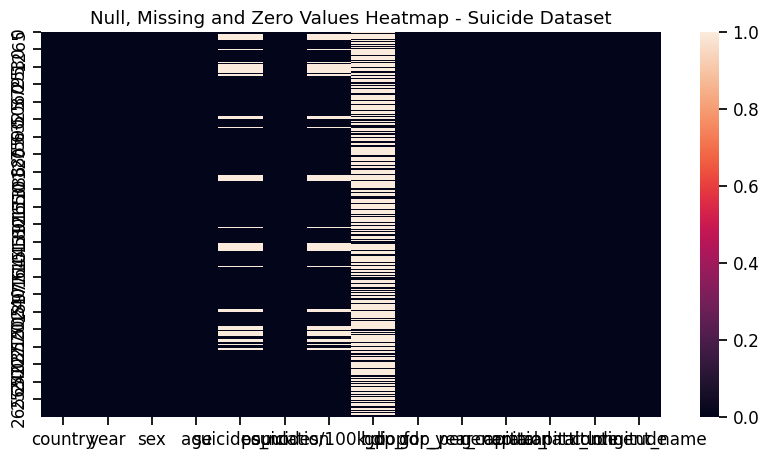

In [28]:
plt.figure(figsize=(10,5), dpi=100)
plt.title("Null, Missing and Zero Values Heatmap - Suicide Dataset")
sns.heatmap((suicide.isnull()) | (suicide == 0))
plt.show()

In [ ]:
plt.figure(figsize=(10,5), dpi=120)
plt.title("Null, Missing and Zero Values Heatmap - HDI Dataset")
sns.heatmap((hdi.isnull()) | (hdi == 0))
plt.show()

##### --- Duplicate Value Checking --- 

In [ ]:
print("Duplicate Value Count: ", suicide.duplicated().sum())

##### --- Dealing with missing values of HDI ---

* The Human Development Index is a slow moving index (We might need a visual evidence for this statment???)
* There are 2 steps to implement:
<ol>
    <li>use the hdi, retrieved from Our World in Data website, to fill those missing values based on country and year</li>
    <li>if there are any missing values left, we will use forward filling technique</li>
</ol>
* Note that : Using forward filling technique will not significantly impact the analysis

In [ ]:
# drop HDI feature in suicide dataset before merging
suicide = suicide.drop(columns='hdi')

##### ------ Implementing the first step ------

In [ ]:
# We will merge those two dataframes without eliminating any rows in suicide dataset (suicide dataset left join hdi dataset)
df = pd.merge(suicide, hdi, how='left', on=['country', 'year'])

In [ ]:
df.isnull().sum()

In [ ]:
remaining_null = df['hdi'].isnull().sum()/len(df['hdi'])
print(f"Remaining missing values of HDI data is about {round(remaining_null,4)*100}%")

The null proportion dramatically decreases from alomost 70% to 21.26%, showing a decrease by roughly 50%

##### ------ Implementing the second step ------

In [ ]:
df['hdi'].fillna(method='bfill', inplace=True)

In [ ]:
remaining_null = df['hdi'].isnull().sum()/len(df['hdi'])
print(f"Remaining missing values of HDI data is about {round(remaining_null,4)*100}%")

##### --- Check how much of data is collected in each year ---

In [ ]:
years = list(df['year'].unique())
data_count = [len(df[df['year'] == year]) for year in years]

In [ ]:
#visualise the difference in each year
plt.figure(figsize=(10,6), dpi=100)
plt.title("Proportion of Data Collected in Each Year")
plt.xlabel("Year")
plt.ylabel("Count(s)")
ax = sns.barplot(x=years, y=data_count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Since there is significantly less data collected in 2016 as opposed to other years, so we will exclude the 2016 data from our analysis.

In [ ]:
df.drop(df[df['year'] == 2016].index, inplace=True)

##### --- Dealing with zero values in suicides_no and suicides/100k_pop columns ---


According to statistics from [World Population Review](https://worldpopulationreview.com/country-rankings/suicide-rate-by-country), we decide to the fill those nulls with the mean which is calculated based country column, despite the fact that some countries may have zero suicidals due to cultural, religious or polical reasons.

In [ ]:
df['suicides_no'] = df.groupby('country')['suicides_no'].transform(lambda x: x.replace(0, np.ceil(x.mean())))
df['suicides/100k_pop'] = df.groupby('country')['suicides/100k_pop'].transform(lambda x: x.replace(0, np.ceil(x.mean())))

In [ ]:
#recheck if there is any remaining zero values
plt.figure(figsize=(10,5), dpi=80)
plt.title("Zero Values Heatmap - Suicide Dataset")
sns.heatmap(df == 0)
plt.show()

# Modeling

In this data mining, we have decided to utilise predictive method, so it is unavoidably to conduct an exploratory data analysis so as to gain either possibly useful insights or an importance of each variable; this will surely help us make a better decision to choose a machine learning algorithm.

## Data Overview (Before Descriptive Procedure)

According to this [worldometer](https://www.worldometers.info/world-population/population-by-country/), we have ten most populous countries in the world listed below

In [ ]:
# top 10 populous countries in the world
top10 = ['China','India','United States','Indonesia','Brazil','Pakistan','Nigeria','Bangladesh','Russia','Mexico']

in_set = df[df['country'].isin(top10)]['country'].unique().tolist()

print(f'Only {len(in_set)} countries are present in our final dataset', in_set, sep='\n\n')

In [ ]:
#how many countries are there in the dataset? What continent are they on? How long does the dataset collected?
print('Dataset has', len(df.country.unique()), 'countries on', len(df.continent_name.unique()), 
      'continents spanning', len(df.year.unique()), 'years.')

##### --- the general overiew of our final dataset ---

In [ ]:
#  population, population percent and country count per continent
df_cont = df.groupby('continent_name')['population'].sum().reset_index()
df_cont['population_percentage'] = df_cont['population']*100/df_cont['population'].sum()

#  countries count per continent
country_continent = df['country'].groupby(df['continent_name']).nunique()

#  add countryCount column to df_cont
df_cont['country_count'] = country_continent[df_cont['continent_name']].values 


#  PLOTs - Population AND Country Count per Continent 
plt.figure(figsize=(10,6), dpi=120)
plt.subplot(121)
ax = sns.barplot(data = df_cont, x = 'population_percentage', y='continent_name')
plt.title('Population', fontsize=14)
plt.xlim([0,45])
plt.ylabel("")
plt.box(False)
for p in ax.patches:
    ax.annotate("{:,.1f}%".format(p.get_width()), (p.get_x() + p.get_width(), p.get_y()+.4), ha='left', va='center')

plt.subplot(122)
ax = sns.barplot(data = df_cont, x = 'continent_name', y='country_count')
plt.title('Country Count\n({} countries)'.format(df_cont.country_count.sum()), fontsize=14)
plt.xlabel('')
plt.xticks(rotation = 90)
plt.ylim([0,50])
plt.box(False)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()+2), ha='center', va='center')

plt.subplots_adjust(wspace=0.4)    
plt.show()

There are 4 points to keep in mind while doing the analysis as well as creating predictive models:
* Only 4 out of 10 countries are present, meaning 6 countries are missing.
* **China** and **India** accounts for roughly 36% of the global population but are missing
* **Europe** has 43 out of 98 countries in the data and accounts for about 38% of the population
* This analysis is likely to be skewed towards European countries

## Descriptive Procedure (Explotory Data Analysis)

#### Insights From Considering the Data For 31 Years (1985-2015)

##### --- Which country has the highest suicide rate for the 100,000 population ---

In [ ]:
country_list = df.country.unique()
country_suicide_ratio = list()

for country in country_list:
    temp_data = df[df.country == country]
    country_suicide_rate = sum(temp_data['suicides/100k_pop'])/len(temp_data)
    country_suicide_ratio.append(country_suicide_rate)

data = pd.DataFrame({'country_list':country_list, 'country_suicide_ratio':country_suicide_ratio})
new_index = (data['country_suicide_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# a bar plot
plt.figure(figsize=(16,10), dpi=100)
sns.barplot(x=sorted_data['country_list'], y=sorted_data['country_suicide_ratio'])
plt.xticks(rotation=90, fontsize=8)
plt.xlabel('Country',)
plt.ylabel("Suicide Rate")
plt.title('The Overall Suicide Rate For The 100,000 population of Each Country (1985-2015)', fontweight='bold')
plt.show()

Why was Lithuania's suicide rate much higher than other countries?

In accordance with this [blog](https://medium.com/@anna.samoylova/why-does-lithuania-have-so-many-suicides-ceead51d569e) from Medium website, suicide is complicated social due to  a number of reasons contributing to it; however, two highly possible factors of the high suicide rate of this country can be: 
* high alcohol consumption
* wide spread of mental health issues, particularly depression, but lacks of proper mental health facilities and professionals

##### -- How old were those who committed suicide? ---

In [ ]:
data = df[['age', 'suicides/100k_pop']].groupby(['age'], as_index=False).mean().sort_values(by='suicides/100k_pop', ascending=False)

plt.figure(figsize=(12,10))
sns.set_palette("Blues_r")
ax = sns.barplot(data = data, x = 'age', y='suicides/100k_pop')
plt.title('The Difference of Suicide Rate Between All Age Group (1985-2015)')
plt.xlabel('Age Interval')
plt.xticks(rotation=90)
plt.ylabel('Suicides Rate Per 100,000 People')
plt.ylim([0,30])
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()+1), ha='center', va='center')

The oldest group, 75+ years old, has the hightest suicide rate per 100,000 population, while the lowest is of 5-14 year old group. 

##### Using F-test (One-Way ANOVA) to check if there is a dependence of suicide rate on the age group
<br>The hypothesis statements for this test are:
$$H_0: \text{Suicide rate and age are independent}$$$$H_1: \text{Suicide rate and age  are dependent}$$

In [ ]:
import scipy.stats as stats

In [ ]:
age_group = [[] for _ in range(len(df.age.unique()))]
i = 0
for age in sorted(df.age.unique()):
    age_group[i] = df['suicides/100k_pop'][df['age'] == age]
    i+=1

In [ ]:
f_stat, pval = stats.f_oneway(age_group[0], age_group[1], age_group[2], age_group[3], age_group[4])

print("F-statistic:", f_stat)
print("p-value:", pval)

In [ ]:
if (pval < 0.05):
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

$$ \text{By performing F-test (One-Way ANOVA), we can conclude that suicide rate and age are dependent with the confidence of 95\%} $$


Why do old people commit suicide? Based on this [blog](https://www.psychologytoday.com/us/blog/understanding-grief/202001/why-do-the-elderly-commit-suicide), an elderly individual is likely to commit suicide due to many possible reasons such as:
* loneliness because of losses of spouse, friends, family, pet, etc.
* physical health problem as well as mental health issues
* (this is my opinion) financial circumstances<br><br>

Why do young people commit suicide? As for the group aged between 5 to 24, despite having the low suicide rate compared to that of the older group, young people might commit suicide because of these reasons:
* academic failure
* bullying, shaming, cyberbullying
* financial problems
* loss of social status
* loss of a close relationship or romantic relationship
* loss of friends or family acceptance due to revealing your sexual orientation

##### --- Gender Ratio of Those Who Committed Suicide ---

In [ ]:
data = df[['sex', 'suicides/100k_pop']].groupby(['sex'], as_index=False).mean()

plt.figure(figsize=(6,10), dpi=100)
sns.set_palette("mako")
ax = sns.barplot(data=data, x='sex',y='suicides/100k_pop')
plt.xlabel("Sex")
plt.ylabel("Suicide Rate Per 100,000 People")
plt.title("Gender Ratio of Those Who Committed Suicide (1985-2015)")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()+0.5), ha='center', va='center')
    
plt.show()

Surprisingly, the average suicide rate among men is about 3 times higher than that of women.

##### Using independent sample t-test to check the difference in suicide rates between males and females with the confidence level of 95%.
<br>The hypothesis statements for this test are:
$$H_0: \text{There is no difference in the suicide rates among males and females}$$$$H_1: \text{There is a difference in the suicide rates among males and females}$$
<br>OR<br>
$$ \text{Let } \mu = \text{ the average suicide rates of population}$$
$$H_0: \mu_\text{ males} = \mu_\text{ females} $$$$ H_1: \mu_\text{ males} \neq \mu_\text{ females}$$

In [ ]:
from scipy import stats

In [ ]:
male = df['suicides/100k_pop'][df['sex'] == 'male']
female = df['suicides/100k_pop'][df['sex'] == 'female']

In [ ]:
# calculate p-value
ttest, pval = stats.ttest_rel(male, female)

print(f't-test value = {ttest}')
print(f'p-value = {np.round(pval, 4)}')

In [ ]:
if pval < 0.05:
    print("Reject the Null Hypothesis")
else:
    print("Accept the Null Hypothesis")

$$ \text{By performing T-test, we can conclude that there is a difference in suicide rates among males and females for entire population with the confidence level of 95\%} $$

Hm...Why? According to this [blog](https://www.verywellmind.com/gender-differences-in-suicide-methods-1067508) from __verywellmind__, there a few points to consider:
* women are more likely to attempt suicide than men; nevertheless, men are more likely to die by suicide than women
* men tend to choose more lethal methods than women, making men more likely to complete the process before anyone can intervene.
* popular men's methods are firearms or hanginng while overdosing or medication are most chosen by women.

##### --- The Difference in Suicide Rate Between Generations ---

In [ ]:
data = df[['generation', 'suicides/100k_pop']].groupby(['generation'], as_index=False).mean()

x_values = ['G.I. Generation (1901-1927)', 'Silent (1928-1945)', 'Boomers (1946-1964)',  'Generation X (1965-1980)', 'Millenials (1981-1996)','Generation Z (1997-2012)']

plt.figure(figsize=(12,8), dpi=80)
sns.set_palette("mako")
ax = sns.barplot(x=x_values,y=data['suicides/100k_pop'][[1, 5, 0, 2, 4, 3]])
plt.xlabel("Generation")
plt.xticks(rotation=60)
plt.ylabel("Suicide Rate Per 100,000 People")
plt.title("The Difference in Suicide Rate Between Generations (1985-2015)", fontweight='bold')

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()+0.5), ha='center', va='center')

As for the bar graph above, we can clearly see that the newer generation is, the less the suicide rate is. There are a multitude of reasons contributing to the decline in suicide rate from generation to generation, and to name a few, 3 obvious factors are:
* an increase in awareness about mental health issues and suicide prevention
* an increase in access to mental health services
* the emergence of social media

### Insights Based on Years

##### --- Number of Suicides by Gender Based on Each Year ---

In [ ]:
plt.figure(figsize=(25,10), dpi=100)
sns.set_style('whitegrid')
sns.set_palette('tab10')
#sns.set_context('paper', 2.0, {"lines.linewidth":1})
sns.barplot(data=df, x='year', y='suicides_no', hue='sex')
plt.title("Number of Suicides by Gender Based on Year", fontweight='bold')
plt.xticks(rotation=90)
plt.show()

This graph can confirm what we've already discussed (male suicides vs. female suicides)

##### --- Number of Suicide by Age Based on Year---

In [ ]:
# graph 1 (1985-2000)
plt.figure(figsize=(30,10), dpi=100)
sns.set_style('whitegrid')
sns.barplot(data=df[df.year <=  2000], x='year', y='suicides_no', hue='age', errorbar=None)
plt.title("Number of Suicides by Gender Based on Year")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# graph 1 (2000-2015)
plt.figure(figsize=(35,15), dpi=100)
sns.set_style('whitegrid')
sns.barplot(data=df[df.year >= 2001], x='year', y='suicides_no', hue='age', errorbar=None)
plt.title("Number of Suicides by Gender Based on Year")
plt.xticks(rotation=90)
plt.show()

In spite of being a bit hard to interpret those 2 plots, the first and most significant insight we gain from this barplot is that the highest number of suicide belongs to the 35-54 year-old group (yellow bar). Why? Hmmm according to articles from [Psychology](https://www.psychologytoday.com/us/blog/understanding-grief/202001/why-do-the-elderly-commit-suicide) Today and [MedicalNewsToday](https://www.medicalnewstoday.com/articles/why-do-people-commit-suicide) the possibly primary factors can be:
* loneliness (changes in their social networks,  loss of a spouse or friends)
* financial issues
* health problems
* relation problems

### Insights of Suicide Rate (Per 100,000 People) Trend and Population between Continents

In [ ]:
# create an ordered list for plotting
cont_list = df.continent_name.sort_values().unique()
cont_glob = np.insert(cont_list, 0, 'Global')  

##### --- Mean Suicide Rates and Ratios per Continent Over Time---

<br><br>
$Suicide Rate Ratio = \dfrac{MaleSuicideRates}{FemaleSuicideRates}$
<br><br>

In [ ]:
for index, row in df_cont.iterrows():
    continent = df_cont.loc[index]['continent_name']
    df_cont.loc[index, 'male'] = df['suicides/100k_pop'][(df['continent_name']==continent) & (df['sex']=='male')].mean()
    df_cont.loc[index, 'female'] = df['suicides/100k_pop'][(df['continent_name']==continent) & (df['sex']=='female')].mean()

# add male and female ratio of suicide means
df_cont['ratio'] = df_cont['male']/df_cont['female']

#  PLOTs - suicide rates per continent AND male/female ratio
plt.figure(figsize=(22,10), dpi=100)
plt.subplot(121)
ax = sns.barplot(data = df, x = 'continent_name', order = cont_list, y = 'suicides/100k_pop', hue = 'sex', errorbar=None, palette = 'ocean')
plt.title('Male & Female Suicide Rates', fontsize=14)
plt.xlabel("")
plt.xticks(rotation = 90)
plt.ylim([0,30])
plt.legend(title = "")
plt.box(False)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()+1), ha='center', va='center')

plt.subplot(122)
ax = sns.barplot(x=df_cont['continent_name'], y=df_cont['ratio'], palette = 'winter')
plt.title('Male vs. Female Suicide Ratio', fontsize=14)
plt.xlabel("")
plt.xticks(rotation = 90)
plt.ylabel('Male/Female Suicide Ratio')
plt.ylim([1,5])
plt.box(False)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2, p.get_height()+.1), ha='center', va='center')
    
plt.subplots_adjust(wspace=0.4)
plt.show()

* From the right graph, __Central America, Europe and South America__ have a similar high of bar, meaning the suicide ratio between those 3 continents are not much different at all. What's more, as for those 3 continents, the percentage of male commiting suicide is dispropotionately higher than female.
* From the left graph, __all continents__ have a high suicide rate in men than women; On the one hand, __Europe__ countries have a higher incidence of females commiting suicides than other countries


##### --- Mean Suicide Rates per Continent Over Time ---

In [ ]:
sns.set_style('white')

In [ ]:
plt.figure(figsize=(18,30))
#plt.title("Suicide Rates & Population")
a = 4   # subplot rows
b = 2   # subplot columns
c = 1   # subplot counter

for i in cont_glob:
    
    if i == 'Global':
        dfx = df   # GLOBAL PLOT
    else:
        dfx = df[df['continent_name'] == i]

    #  subplots        
    plt.subplot(a,b,c)
    tw1 = sns.lineplot(data = dfx, x='year', y='population', errorbar = None, hue = 'sex', palette = 'hsv')
    #plt.legend(bbox_to_anchor =(1.4, 1), loc='upper right', frameon=False)
    tw2 = tw1.twinx()
    tw2 = sns.lineplot(data = dfx, x='year', y='suicides/100k_pop', color ='grey', errorbar = None, style = True, dashes = [(2,2)])
    plt.legend('',frameon=False)
    plt.title(f'{i.upper()}', fontweight='bold')
    plt.xlim(1985, 2015) 
    c = c + 1
plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()

 * __Globally__, the overall suicide trend has been sharply declining since 1995, while the population has been increasing significantly in recent years.
 * __Africa__ saw a sharp increase in suicides in 2005-2006. Moreover, suicide rates have fluctuated in recent years.
 * __Asia__ is seeing an uptick in suicides in recent years despite, in general, a downward trend of suicide rates throughout the period.
 * __Central America and Europe__ have an alike trend in population, seeing a fluctuation. The suicide rates in both continents has also decreased in the last few years.
 * __South America__ has an amazingly increasing trend in population; nevertheless, the upward trend also belongs to the suicide rate between 1985 and 2010, yet the rate slumped repidly afterwards.

### Insights of Suicide Rate (Per 100,000 People) Trend and Age Group between Gender in all Continents

In [ ]:
age_list = ['5-14 years', '15-24 years', '25-34 years', '35-54 years',  '55-74 years', '75+ years']

In [ ]:
#  plot Suicide Rates & Age Group over Time
plt.figure(figsize=(20,50))
a = 8   # subplot rows
b = 2   # subplot columns
c = 1   # subplot counter

for i in cont_glob:
    
    if i == 'Global':
        dfx = df   
    else:
        dfx = df[df['continent_name'] == i]

    #  subplot 1 - male  
    plt.subplot(a,b,c)  # male
    tw1 = sns.lineplot(data = dfx[dfx['sex'] == 'male'], x='year',    y='suicides/100k_pop', hue='age', hue_order = age_list, errorbar = None)
    plt.title(f'{i.upper()}:  Suicide Rates & Age (MALE)', fontweight='bold')
    plt.legend('',frameon=False)
    plt.xlim([1985,2015])
    
    tw2 = tw1.twinx()
    tw2 = sns.lineplot(data = dfx[dfx['sex'] == 'male'], x='year',  y='suicides/100k_pop', color ='grey', errorbar = None, style = True, dashes = [(2,2)])
    plt.legend('',frameon=False)
    plt.xlim([1985,2015])
    plt.ylabel("")
    c = c + 1
    
    #  subplot 2 - female
    plt.subplot(a,b,c)  # female
    tw1 = sns.lineplot(data = dfx[dfx['sex'] == 'female'], x='year',  y='suicides/100k_pop', hue='age', hue_order = age_list, errorbar = None)
    plt.legend(bbox_to_anchor =(1.4, 1), loc='upper right', frameon=False)
    plt.xlim([1985,2015])
    plt.ylabel("")
    
    tw2 = tw1.twinx()
    tw2 = sns.lineplot(data = dfx[dfx['sex'] == 'female'], x='year',    y='suicides/100k_pop', color ='grey', errorbar = None, style = True, dashes = [(2,2)])
    plt.title(f'{i.upper()}:  Suicide Rates & Age (FEMALE)', fontweight='bold')
    plt.legend('',frameon=False)
    plt.xlim([1985,2015])
    plt.ylabel("")
    c = c + 1

plt.tight_layout()
plt.show()

* __Global__: As for both genders, after the spike in suicide rates in __1995__, the rate globally has a steady decline for all age groups.
* __Asia__: The trend of suicide rates has steadily declined in both genders; except that the trend for males over 75 years old has had a slight increase.
* __North America__: The trend of suicide rate for males over 75 years old reached a peak in 1995 and then steadily declined; on the contrary, the rate for women at the same age group experienced the similar trend but instead peaked in 2000 before a decrease in the rate.

### Suicide Rate Trends and Human Development Index (HDI)

##### --- Suicide Rate and HDI Trend for All Continents Over Time ---

In [ ]:
#  plot Suicide Rates & HDI over Time
plt.figure(figsize=(15,22), dpi=100)
a = 4   # subplot rows
b = 2   # subplot columns
c = 1   # subplot counter

for i in cont_glob:
    
    if i == 'Global':
        dfx = df   
    else:
        dfx = df[df['continent_name'] == i]

    #  subplots        
    plt.subplot(a,b,c)
    tw1 = sns.lineplot(data = dfx, x='year', y='hdi')
    
    tw2 = tw1.twinx()
    tw2 = sns.lineplot(data = dfx, x='year', y='suicides/100k_pop', color ='grey', errorbar = None, style = True, dashes = [(2,2)])
    tw2 = plt.legend('',frameon=False)
    tw2 = plt.xlim([1985,2015])
    plt.title(f'{i.upper()} :  Suicide Rates & HDI', fontweight='bold')
    plt.grid()
    c = c + 1

plt.tight_layout()
plt.show()

* Overall, HDI has increased while the suicide rate has had a steadily downward trend, showing an inverse relationship between HDI and suicide rate.
* However, it is important to note the improvement in HDI might not immediately have an effect on the suicide rate, meaning the decline in suicide rate may need some time to occur. By taking South America as an example, we can see an obvious surge in HDI since 1994, yet the suicide rate did not show a clear decrease until 2013, which took around 18 years before the rate went down.

### Suicide Trends and Gross Domestic Product per Capita (GDPc)

##### --- GDPc for All Continents Over Time ---

In [ ]:
plt.figure(figsize=(15,22), dpi=100)
a = 4   # subplot rows
b = 2   # subplot columns
c = 1   # subplot counter

for i in cont_glob:
    
    if i == 'Global':
        dfx = df   # GLOBAL PLOT
    else:
        dfx = df[df['continent_name'] == i]

    #  subplots        
    plt.subplot(a,b,c)
    tw1 = sns.lineplot(data = dfx, x='year', y='gdp_per_capita')
    
    tw2 = tw1.twinx()
    tw2 = sns.lineplot(data = dfx, x='year', y='suicides/100k_pop', color ='grey', errorbar = None, style = True, dashes = [(2,2)])
    tw2 = plt.legend('',frameon=False)
    tw2 = plt.xlim([1985,2015])
    plt.title(f'{i.upper()}:  Suicide Rates & GDP')
    plt.grid()
    c = c + 1

plt.tight_layout()
plt.show()

* __Gross Domestic Product per Capita (GDPc)__: Overall GDP has increased and the suicide rate has steadily gone down, showing an inverse relationship between GDP and suicide rates.
* According to a [study](https://bmjopen.bmj.com/content/bmjopen/2/3/e000785.full.pdf) by Blasco-Fontecilla et al. (2012), a rise in an economic development can result in an adoption of “the implementation of national mental health policies and infrastructures” or “universal healthcare”, which can be linked a reduction in suicide rate

### Correlations

Two important steps before performing correlation:
1. Encoding categorical attributes with numerical values
2. Normalization of the data

In [ ]:
df_copy = df.copy()

##### --- Step 1 ---

In [ ]:
df_corr = df_copy[['suicides/100k_pop', 'sex', 'age', 'population', 'hdi', 'gdp_per_capita', 'gdp_for_year', 'generation', 'continent_name']]

df_corr.loc[:, 'sex'] = df_corr['sex'].replace({'female': 0, 'male': 1})
df_corr.loc[:, 'age'] = df_corr['age'].replace({'5-14 years': 0, '15-24 years': 1, '25-34 years': 2, '35-54 years': 3, '55-74 years': 4, '75+ years': 5})
df_corr.loc[:, 'generation'] = df_corr['generation'].replace({'Generation Z': 0, 'Millenials': 1, 'Generation X': 2, 'Boomers': 3, 'Silent': 4, 'G.I. Generation': 5})
df_corr.loc[:, 'continent_name'] = df_corr['continent_name'].replace({'Africa': 0, 'Asia': 1, 'Australia': 2, 'Central America': 3, 'Europe': 4, 'North America': 5, 'South America': 6})

df_corr.info()

In [ ]:
df_corr.loc[:,'gdp_for_year'] = df_corr['gdp_for_year'].str.replace(',', '')

In [ ]:
df_corr = df_corr.astype({
    'sex':'int64',
    'age':'int64',
    'gdp_for_year':'int64',
    'generation':'int64',
    'continent_name':'int64'
})

In [ ]:
df_corr.head()

##### --- Step 2 ---

Performing a correlation on normalized data can lead a better result.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_norm = MinMaxScaler().fit_transform(df_corr)
df_corr = pd.DataFrame(df_norm, index = df_corr.index, columns = df_corr.columns)

##### --- Overall Correlation ---

In [ ]:
dataCorr = df_corr.corr()

dataCorr['suicides/100k_pop'].sort_values(ascending=False)

mask = np.triu(np.ones_like(dataCorr, dtype=bool))

plt.figure(figsize=(11,11))
plt.title('Suicide Correlation')
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'YlGnBu', mask=mask)
plt.show()

* Age, generation and sex are significant factors in determining suicide rates
* HDI is moderately correlated with GDPc

##### --- Correlation - Male & Female ---

In [ ]:
#  Correlation MALE - filter dataframe for male/female
df_male   = df_corr[(df_corr['sex'] == 1)]             
df_maleCorr = df_male.drop(["sex"], axis=1).corr()
mask1 = np.triu(np.ones_like(df_maleCorr, dtype=bool))

#  Correlation FEMALE - filter dataframe for male/female
df_female = df_corr[(df_corr['sex'] == 0)]              
df_femaleCorr = df_female.drop(["sex"], axis=1).corr()
mask2 = np.triu(np.ones_like(df_femaleCorr, dtype=bool))


In [ ]:
fig = plt.figure(figsize=(26,14))

fig.add_subplot(121)
plt.title('Suicide Correlation - MALE', fontsize=16, fontweight='bold')
sns.heatmap(df_maleCorr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r', mask=mask1)

fig.add_subplot(122)
plt.title('Suicide Correlation - FEMALE ', fontsize=16, fontweight='bold')
sns.heatmap(df_femaleCorr, annot=True, fmt='.2f', square=True, cmap = 'BuPu', mask=mask2)
plt.show()

* In both genders, generation and age are significant factors in determining suicide rates.
* We can see a strongly positive correlation between HDI and GDPc in both males and females.
* Again, as mentioned above, it is interesting to note that there is a positive relationship between HDI and suicide rates despite being relatively low.

## Predictive Procedure

### Cluster Analysis

The task is to find out how many intrinsic groups in terms of suicide rates?

In [ ]:
# cluster_data = df.copy()
#cluster_data.to_csv("clusterData.csv", index=False)

In [ ]:
# # prepare data
# cluster_data[["country","age","sex","generation", "continent_name"]] = cluster_data[["country","age","sex","generation", "continent_name"]].astype("category")
# cluster_data['gdp_for_year'] = cluster_data['gdp_for_year'].str.replace(',', '').astype("int64")

# columns = cluster_data.select_dtypes('category').columns

# cluster_data[columns] = cluster_data[columns].apply(lambda fx: fx.cat.codes)

In [ ]:
cluster_data.info()

### Predictive Modeling

In [ ]:
import sklearn

In [ ]:
data = df.copy()

##### --- Data Preprocessing ---

In [ ]:
#drop unneeded columns
data.drop(columns=['capital_lattitude', 'capital_longitude', 'continent_name'], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical = ['country', 'year', 'age', 'sex', 'generation']
label_encoders = {}

for col in categorical:
    le = LabelEncoder()
    le.fit(data[col])
    label_encoders[col] = le
    data[col] = le.transform(data[col])
    
# save the label encoder
joblib.dump(label_encoders, './models/label_encoder.joblib')

##### --- Splitting the Data ---

In [ ]:
#data.info()

In [ ]:
data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)

In [ ]:
y = data['suicides/100k_pop']
X = data.drop('suicides/100k_pop', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
numerical_features = ['suicides_no', 'population', 'gdp_for_year', 'gdp_per_capita']

In [ ]:
# scaling numerical data
from sklearn.preprocessing import RobustScaler

X_scaler = RobustScaler()
X_train[numerical_features] = X_scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = X_scaler.transform(X_test[numerical_features])

# save the numerical features model
joblib.dump(X_scaler, './models/num_features_scaler.joblib')

y_scaler = RobustScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

# save the numerical features model
joblib.dump(y_scaler, './models/target_scaler.joblib')

In [ ]:
# data

##### --- Model Building & Training ---

Since the dataset comes under regression problem (i.e. the prediction of suicide rate is a continuous number), we decided to implement the machine learning algorithm for regression lised below:
* k-Nearest Neighbors Regression
* Linear Regression
* Decision Tree
* Random Forest
* Multilayer Perceptrons (Neural Network)
* XGBoost

Also, the metrics considered and applied to evaluate the model performance are 
* Accuracy 
* Root Mean Squared Error (RMSE)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))
    rmse_train.append(round(c, 3))
    rmse_test.append(round(d, 3))

* __k-Nearest Neghbors Regression__

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(knn, param_grid, cv=10)

knn_grid.fit(X_train, y_train)

In [ ]:
knn_para = knn_grid.best_params_
print(knn_para)

In [ ]:
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

In [ ]:
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

In [ ]:
storeResults('k-Nearest Neighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

* __Linear Regression__

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


lr.fit(X_train, y_train)

In [ ]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

In [ ]:
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [ ]:
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

In [ ]:
print(acc_train_lr, acc_test_lr)

In [ ]:
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)

* __Polynomial Regression__

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('lr', LinearRegression())
])

params = {
    'poly__degree': [1, 2, 3, 4, 5],
    'lr__fit_intercept':[True, False]
}

In [ ]:
poly_grid = GridSearchCV(pipeline, params, cv=5, n_jobs=-1)
poly_grid.fit(X_train, y_train)

In [ ]:
print("Best hyperparameters: ", poly_grid.best_params_)
print("Best score: ", poly_grid.best_score_)

In [ ]:
y_test_poly = poly_grid.predict(X_test)
y_train_poly = poly_grid.predict(X_train)

In [ ]:
acc_train_poly = poly_grid.score(X_train, y_train) 
acc_test_poly = poly_grid.score(X_test, y_test)

rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_poly))
rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_poly))

In [ ]:
storeResults('Polynomial Regression', acc_train_poly, acc_test_poly, rmse_train_poly, rmse_test_poly)

* __Decision Tree__

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
training_accuracy = []
test_accuracy = []

depth = range(1, 31)
for n in depth:
    
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train, y_train)
    
    training_accuracy.append(tree.score(X_train, y_train))
    
    test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

The model clearly overfits when max_depth is over roughly 9

In [ ]:
tree = DecisionTreeRegressor(max_depth=9)

tree.fit(X_train, y_train)

In [ ]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)


rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))


In [ ]:
storeResults('Decision Tree',acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

* __Random Forest__

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
forest = RandomForestRegressor()

In [ ]:
params = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

random_search_forest = RandomizedSearchCV(forest, params, cv=10, n_jobs=-1, n_iter=30, random_state=42)
random_search_forest.fit(X_train, y_train)

In [ ]:
print("Best hyperparameters: ", random_search_forest.best_params_)
#print("Best score: ", -random_search_forest.best_score_)

In [ ]:
best_param_rf = random_search_forest.best_params_

In [ ]:
y_test_forest = random_search_forest.predict(X_test)
y_train_forest = random_search_forest.predict(X_train)

In [ ]:
acc_train_forest = random_search_forest.score(X_train, y_train)
acc_test_forest = random_search_forest.score(X_test, y_test)

rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

In [ ]:
storeResults('Random Forest',acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

* __Multilayer Perceptrons (MLPs) or Neural Network__

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=([100,100]))

mlp.fit(X_train, y_train)

In [ ]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [ ]:
acc_train_mlp = mlp.score(X_train, y_train)
acc_test_mlp = mlp.score(X_test, y_test)

rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_test_mlp))

In [ ]:
print(acc_train_mlp, acc_test_mlp)

In [ ]:
mlp = MLPRegressor()

params = {'hidden_layer_sizes': [(50, 50), (100, 100)],
          'activation': ['relu', 'tanh'],
          'learning_rate': ['constant', 'adaptive'],
          'alpha': [0.001, 0.01]}

mlp_grid_search = GridSearchCV(mlp, params, cv=10, n_jobs=-1, verbose=2)
mlp_grid_search.fit(X_train, y_train)

In [ ]:
print("Best parameters:", mlp_grid_search.best_params_)

In [ ]:
y_test_mlp = mlp_grid_search.predict(X_test)
y_train_mlp = mlp_grid_search.predict(X_train)

In [ ]:
acc_train_mlp = mlp_grid_search.score(X_train, y_train)
acc_test_mlp = mlp_grid_search.score(X_test, y_test)

rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_test_mlp))

In [ ]:
storeResults('Multilayer Perceptron Regression',acc_train_mlp, acc_test_mlp, rmse_train_mlp, rmse_test_mlp)

* __XGBoost Regression__

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate=0.2,max_depth=4)

xgb.fit(X_train, y_train)

In [ ]:
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
acc_train_xgb = xgb.score(X_train, y_train)
acc_test_xgb = xgb.score(X_test, y_test)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_xgb))

In [ ]:
print(acc_train_xgb, acc_test_xgb)

Let's tune the model's hyperparameter

In [ ]:
xgb = XGBRegressor(early_stopping_rounds=10)

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

xgb_grid_search = GridSearchCV(xgb, param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

In [ ]:
best_params = xgb_grid_search.best_params_
xgb = XGBRegressor(**best_params, early_stopping_rounds=10)
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

In [ ]:
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
acc_train_xgb = xgb.score(X_train, y_train)
acc_test_xgb = xgb.score(X_test, y_test)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_xgb))

In [ ]:
storeResults('XGBoost Regression',acc_train_xgb, acc_test_xgb, rmse_train_xgb, rmse_test_xgb)

# Evaluation

##### --- Model Comparison ---

In [ ]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [ ]:
sorted_results = results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)
sorted_results

In [ ]:
plt.figure(figsize=(17, 13), dpi=120)

custom_palette1 = sns.color_palette("Blues_r", n_colors=7)
custom_palette2 = sns.color_palette("PuRd_r", n_colors=7)

plt.subplot(221)
sns.barplot(data=sorted_results, x='ML Model', y='Test Accuracy', palette=custom_palette1)
plt.title("Model Performance in Accuracy (R^2)", fontweight='bold')
plt.xticks(rotation=90)
for idx, value in enumerate(sorted_results['Test Accuracy']):
    plt.text(idx, value, round(value, 3), ha='center', va='bottom')

plt.subplot(222)
plt.title("Model Performance in RMSE", fontweight='bold')
sns.barplot(data=sorted_results, x='ML Model', y='Test RMSE', palette=custom_palette2)
plt.xticks(rotation=90)
for idx, value in enumerate(sorted_results['Test RMSE']):
    plt.text(idx, value, round(value, 3), ha='center', va='bottom')


plt.show()

# Deployment

XGBoost and Random Forest Model will be exported for a purpose of deployment.

In [ ]:
import joblib

In [ ]:
xgb = XGBRegressor(**best_params, early_stopping_rounds=10)
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

In [ ]:
joblib.dump(xgb, './models/XGBoost_model.joblib')

In [ ]:
# train a model with best parametre

In [ ]:
forest = RandomForestRegressor(**best_param_rf)
forest.fit(X_train, y_train)

In [ ]:
joblib.dump(forest, './models/RandomForestModel.joblib')

In [ ]:
# #label encoder
# new_data = df.copy()

In [ ]:
# new_data.drop(columns=['capital_lattitude', 'capital_longitude', 'continent_name'], inplace=True)
# new_data['gdp_for_year'] = new_data['gdp_for_year'].str.replace(',','').astype(float)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# categorical = ['country', 'year', 'age', 'sex', 'generation']
# encoders = {}

# for col in categorical:
#     encoder = LabelEncoder()
#     encoder.fit(new_data[col])
#     encoders[col] = encoder

In [ ]:
# joblib.dump(encoders, './models/label_encoder.joblib')

In [ ]:
# #numerical encoder
# from sklearn.preprocessing import RobustScaler

# numerical = ['suicides_no', 'population', 'suicides/100k_pop', 'gdp_for_year', 'gdp_per_capita']

# num_encoder = RobustScaler()
# num_encoder.fit(new_data[numerical])
    
# joblib.dump(num_encoder, './models/num_encoder.joblib')

In [ ]:
# num_encoder.center_

In [ ]:
# new_data

In [ ]:
# xgb_model = joblib.load("./models/XGBoost_model.joblib")
# label_encoder_model = joblib.load("./models/label_encoder.joblib")
# num_encoder_model = joblib.load("./models/num_encoder.joblib")

In [ ]:
# test_data = df.drop(columns=['capital_lattitude', 'capital_longitude', 'continent_name'])
# test_data['gdp_for_year'] = test_data['gdp_for_year'].str.replace(',','').astype(float)

In [ ]:
# new_collected_data = test_data.sample(10)

In [ ]:
# for cat, encoder in label_encoder_model.items():
#     new_collected_data[cat] = encoder.transform(new_collected_data[cat])

In [ ]:
# new_collected_data[numerical] = num_encoder_model.transform(new_collected_data[numerical])

In [ ]:
# new_collected_data.columns

In [ ]:
# X = new_collected_data[['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'gdp_for_year', 'gdp_per_capita', 'generation',
#        'hdi']]
# y = new_collected_data['suicides/100k_pop']